<h1 style="text-align:center; text-shadow: 1px 1px 2px black;">
  Viewership for TV series 
  <span style="color:gold;">
    <span style="font-family:Impact, sans-serif; font-style:oblique; font-weight:bold; font-size:1.25em;">
      Brooklyn
    </span>
    <span style="font-family:'Helvetica Neue', Helvetica, sans-serif; font-weight:900; font-style:italic;">
      Nine-Nine
    </span>
  </span>
</h1>


![Brooklyn Nine-Nine Poster](brooklyn-99-poster.webp)

*Source of image: [NBC Store](https://www.nbcstore.com/collections/brooklyn-nine-nine)*


## About the show

*Brooklyn Nine-Nine* is an American police procedural sitcom television series that aired on Fox, and later on NBC, from **September 17, 2013**, to **September 16, 2021**, for eight seasons and 153 episodes. Created by [Dan Goor](https://en.wikipedia.org/wiki/Dan_Goor) and [Michael Schur](https://en.wikipedia.org/wiki/Michael_Schur), it revolves around seven New York City Police Department (NYPD) detectives who are adjusting to life under their new commanding officer, the serious and stern Captain Raymond Holt ([Andre Braugher](https://en.wikipedia.org/wiki/Andre_Braugher)). [Andy Samberg](https://en.wikipedia.org/wiki/Andy_Samberg) led the ensemble cast, which featured [Braugher](https://en.wikipedia.org/wiki/Andre_Braugher), [Stephanie Beatriz](https://en.wikipedia.org/wiki/Stephanie_Beatriz), [Terry Crews](https://en.wikipedia.org/wiki/Terry_Crews), [Melissa Fumero](https://en.wikipedia.org/wiki/Melissa_Fumero), [Joe Lo Truglio](https://en.wikipedia.org/wiki/Joe_Lo_Truglio), [Chelsea Peretti](https://en.wikipedia.org/wiki/Chelsea_Peretti), [Dirk Blocker](https://en.wikipedia.org/wiki/Dirk_Blocker), and [Joel McKinnon Miller](https://en.wikipedia.org/wiki/Joel_McKinnon_Miller).

Fox originally ordered 13 episodes of the single-camera comedy for its first season, eventually expanding it to 22 episodes. *Brooklyn Nine-Nine* premiered on **September 17, 2013**. On **May 10, 2018**, Fox cancelled it after five seasons; the next day, NBC picked it up for a sixth season, which premiered on **January 10, 2019**. The seventh season premiered in **February 2020**. The 10-episode eighth and final season premiered on **August 12, 2021**.



*Source of text: [Wikipedia](https://en.wikipedia.org/wiki/Brooklyn_Nine-Nine#Episodes)*

## Critical Acclaim vs. Viewership

*Brooklyn Nine-Nine* was widely praised by critics and audiences alike — but did that acclaim translate into strong and sustained viewership?

### Awards & Recognition:

- 🏆 **Golden Globe Award for Best Television Series – Musical or Comedy** (Season 1)
- 🏆 **Golden Globe Award for Best Actor – Television Series Musical or Comedy**  
  Awarded to [Andy Samberg](https://en.wikipedia.org/wiki/Andy_Samberg) for his performance as Jake Peralta (Season 1)
- 🏆 **Critics' Choice Television Award for Best Supporting Actor in a Comedy Series**  
  Awarded twice to [Andre Braugher](https://en.wikipedia.org/wiki/Andre_Braugher)
- 🎭 **Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series**  
  [Andre Braugher](https://en.wikipedia.org/wiki/Andre_Braugher) was nominated four times
- 🌈 **GLAAD Media Award for Outstanding Comedy Series** (2018)  
  Honoring its portrayal of LGBTQ+ characters and inclusive storytelling

<!-- Add any additional awards (e.g. People's Choice, TCA) if needed -->

Despite the critical acclaim, the series faced fluctuating viewership across seasons — even facing cancellation before being revived by another network. Let’s explore how those viewership numbers evolved over time.

*Source of information: [Wikipedia](https://en.wikipedia.org/wiki/Brooklyn_Nine-Nine#Episodes)*


### Loading the dataset + Initial Inspection

I created a csv file based on data from the Wikipedia page. The data contains season, episode, name of the episode, US viewership in milions and date on which the episode aired. In the webpage date is stored as text, so we need to convert it to correct data type to be able to inspect trend over time. Below you can see the first few rows of the dataset. 

*Source of data: [Wikipedia](https://en.wikipedia.org/wiki/List_of_Brooklyn_Nine-Nine_episodes)*

In [39]:
df = pd.read_csv("Brooklyn_99_Viewership_Data.csv", encoding='cp1252')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()


,Season,Episode,Name of Episode,Viewers (millions),Date
0,1,1,Pilot,6.17,2013-09-17
1,1,2,The Tagger,4.03,2013-09-24
2,1,3,The Slump,3.43,2013-10-01
3,1,4,M.E. Time,3.34,2013-10-08
4,1,5,The Vulture,3.43,2013-10-15


In [40]:
from IPython.display import Markdown, display

# Calculations
total_seasons = df["Season"].nunique()
total_episodes = df["Episode"].count()
overall_avg = round(df["Viewers (millions)"].mean(), 2)
first_date = df["Date"].min().strftime("%B %d, %Y")
last_date = df["Date"].max().strftime("%B %d, %Y")
num_years = df["Date"].max().year - df["Date"].min().year + 1

# Season with highest/lowest average viewership
season_avgs = df.groupby("Season")["Viewers (millions)"].mean().round(2)
best_season = season_avgs.idxmax()
best_avg = season_avgs.max()
worst_season = season_avgs.idxmin()
worst_avg = season_avgs.min()

# Viewership for Seasons 5 and 6
season_5_avg = season_avgs.loc[5]
season_6_avg = season_avgs.loc[6]

summary = f"""
<p style="font-size: 16px;">
<em>Brooklyn Nine-Nine</em> ran for a total of <strong>{total_seasons} seasons</strong>, spanning <strong>{total_episodes} episodes</strong>. Over the course of the show, the average U.S. viewership per episode was approximately <strong>{overall_avg} million</strong> viewers.
</p>

<p style="font-size: 16px;">
The series premiered on <strong>{first_date}</strong>, and concluded on <strong>{last_date}</strong>, marking a successful run of approximately <strong>{num_years} years</strong> on television.
</p>

<p style="font-size: 16px;">
The season with the <strong>highest average viewership</strong> was <strong>Season {best_season}</strong>, averaging <strong>{best_avg} million</strong> viewers, while the <strong>lowest</strong> occurred in <strong>Season {worst_season}</strong>, with <strong>{worst_avg} million</strong> viewers.
</p>

<p style="font-size: 16px;">
Notably, after the show was cancelled by <em>Fox</em> and picked up by <em>NBC</em>, viewership rebounded significantly. The average audience grew from <strong>Season 5 ({season_5_avg}M)</strong> to <strong>Season 6 ({season_6_avg}M)</strong> — a rare and impressive resurgence for a show in its later seasons.
</p>
"""

display(Markdown(summary))




<p style="font-size: 16px;">
<em>Brooklyn Nine-Nine</em> ran for a total of <strong>8 seasons</strong>, spanning <strong>153 episodes</strong>. Over the course of the show, the average U.S. viewership per episode was approximately <strong>2.62 million</strong> viewers.
</p>

<p style="font-size: 16px;">
The series premiered on <strong>September 17, 2013</strong>, and concluded on <strong>September 16, 2021</strong>, marking a successful run of approximately <strong>9 years</strong> on television.
</p>

<p style="font-size: 16px;">
The season with the <strong>highest average viewership</strong> was <strong>Season 1</strong>, averaging <strong>3.98 million</strong> viewers, while the <strong>lowest</strong> occurred in <strong>Season 8</strong>, with <strong>1.69 million</strong> viewers.
</p>

<p style="font-size: 16px;">
Notably, after the show was cancelled by <em>Fox</em> and picked up by <em>NBC</em>, viewership rebounded significantly. The average audience grew from <strong>Season 5 (1.76M)</strong> to <strong>Season 6 (2.24M)</strong> — a rare and impressive resurgence for a show in its later seasons.
</p>


In [41]:
# Creating a short summary based on seasons with avarage of viewership
season_summary = df.groupby("Season").agg({
    "Episode": "count",
    "Viewers (millions)": "mean",
    "Date": ["min", "max"]
})

season_summary.columns = ["Number of Episodes", "Average Viewership", "First Episode Date", "Last Episode Date"]
season_summary["Average Viewership"] = season_summary["Average Viewership"].round(2)
season_summary = season_summary.reset_index()

# Creating the summary row
total_episodes = df["Episode"].count()
overall_avg = round(df["Viewers (millions)"].mean(), 2)
first_air_date = df["Date"].min()
last_air_date = df["Date"].max()

total_row = {
    "Season": "Total",
    "Number of Episodes": total_episodes,
    "Average Viewership": overall_avg,
    "First Episode Date": first_air_date,
    "Last Episode Date": last_air_date
}

season_summary = pd.concat([season_summary, pd.DataFrame([total_row])], ignore_index=True)

season_summary

,Season,Number of Episodes,Average Viewership,First Episode Date,Last Episode Date
0,1,22,3.98,2013-09-17,2014-03-25
1,2,23,3.54,2014-09-28,2015-05-17
2,3,23,2.73,2015-09-27,2016-04-19
3,4,22,2.11,2016-09-20,2017-05-23
4,5,22,1.76,2017-09-26,2018-05-20
5,6,18,2.24,2019-01-10,2019-05-16
6,7,13,2.06,2020-02-06,2020-04-23
7,8,10,1.69,2021-08-12,2021-09-16
8,Total,153,2.62,2013-09-17,2021-09-16


### Viewership overtime

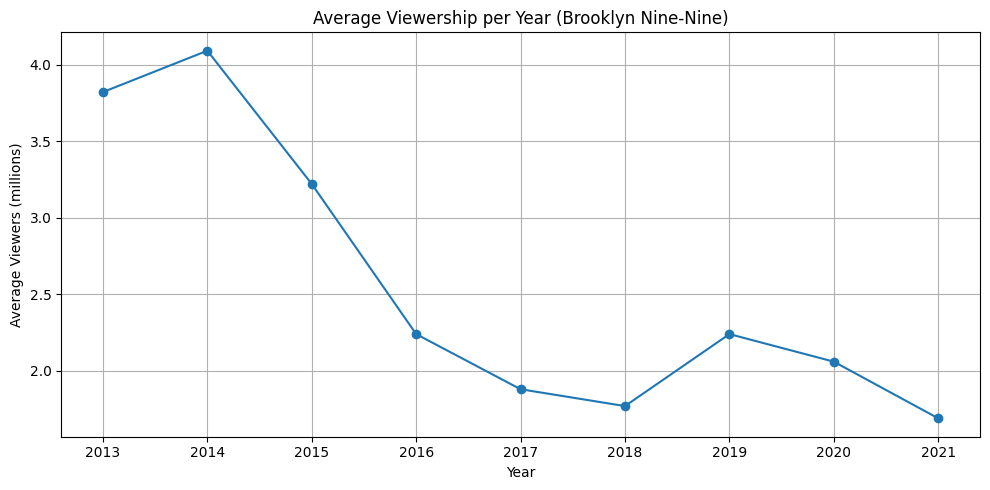

In [42]:
import matplotlib.pyplot as plt
df["Year"] = df["Date"].dt.year
yearly_avg = df.groupby("Year")["Viewers (millions)"].mean().reset_index()

yearly_avg["Viewers (millions)"] = yearly_avg["Viewers (millions)"].round(2)

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["Viewers (millions)"], marker='o', linestyle='-')

plt.title("Average Viewership per Year (Brooklyn Nine-Nine)")
plt.xlabel("Year")
plt.ylabel("Average Viewers (millions)")
plt.xticks(yearly_avg["Year"])
plt.grid(True)
plt.tight_layout()

plt.show()


### Viewership changes episode-to-episode

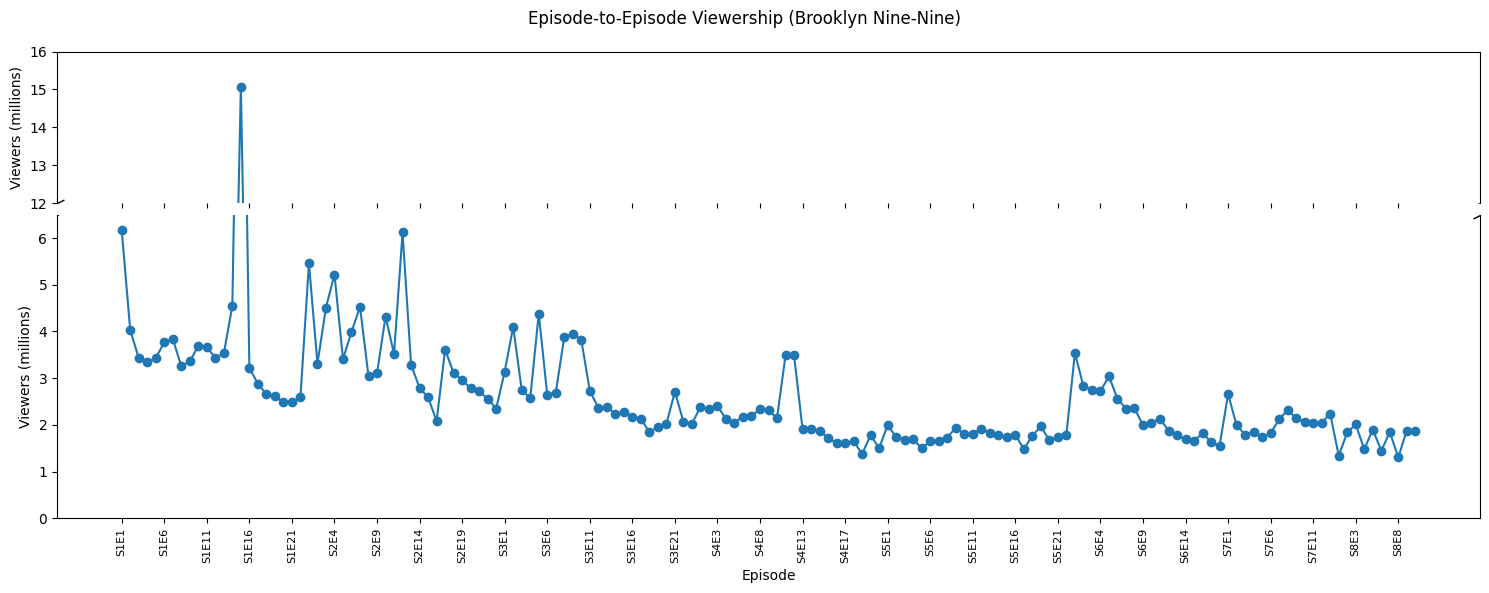

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_sorted = df.sort_values("Date")
df_sorted["Episode Label"] = "S" + df_sorted["Season"].astype(str) + "E" + df_sorted["Episode"].astype(str)

x = df_sorted["Episode Label"]
y = df_sorted["Viewers (millions)"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6), gridspec_kw={'height_ratios': [1, 2]})

ax1.plot(x, y, marker='o', linestyle='-', color='tab:blue')
ax2.plot(x, y, marker='o', linestyle='-', color='tab:blue')

# Because of one outlier we need to rescale the graph to see changes in viewership per episodes better
ax1.set_ylim(12, 16)  # upper range
ax2.set_ylim(0, 6.5)    # normal episode range

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)

d = .5 
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle='none', color='k', mec='k', mew=1)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.suptitle("Episode-to-Episode Viewership (Brooklyn Nine-Nine)")
ax2.set_xlabel("Episode")
ax1.set_ylabel("Viewers (millions)")
ax2.set_ylabel("Viewers (millions)")
ax2.set_xticks(range(0, len(x), 5))
ax2.set_xticklabels(x[::5], rotation=90, fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()


In [44]:
top_3 = df.sort_values("Viewers (millions)", ascending=False).head(3)
bottom_3 = df.sort_values("Viewers (millions)", ascending=True).head(3)

columns_to_show = ["Season", "Episode", "Name of Episode", "Viewers (millions)","Date"]

print("📈 Top 3 Most Watched Episodes:\n")
print(top_3[columns_to_show].to_string(index=False))

print("\n📉 Bottom 3 Least Watched Episodes:\n")
print(bottom_3[columns_to_show].to_string(index=False))


📈 Top 3 Most Watched Episodes:

 Season  Episode           Name of Episode  Viewers (millions)       Date
      1       15 Operation: Broken Feather               15.07 2014-02-02
      1        1                     Pilot                6.17 2013-09-17
      2       12               Beach House                6.12 2015-01-04

📉 Bottom 3 Least Watched Episodes:

 Season  Episode    Name of Episode  Viewers (millions)       Date
      8        8            Renewal                1.31 2021-09-02
      8        2     The Lake House                1.34 2021-08-12
      4       20 The Slaughterhouse                1.38 2017-05-16


## Summary 

While the overall trend showed a gradual decline in viewership over the years, there were notable spikes tied to special episodes and premieres. The **most-watched episode** by far was *“Operation: Broken Feather”* (S1E15), which aired as part of a special post-Super Bowl lineup and drew **15.07 million** viewers — significantly higher than any other episode.

Interestingly, two of the **least-viewed episodes** aired in the show's final season (*“Renewal”* and *“The Lake House”*), suggesting audience fatigue or reduced exposure after the show’s network change. However, the episode-level viewership remained relatively stable across most seasons, with only a few sharp declines or peaks, reflecting a consistent and loyal core audience.
